# **Importing the dataset**

In [ ]:
import pandas as pd
from google.colab import drive

# Importing crime dataset from google drive
drive.mount('/content/drive')
root_folder = '/content/drive/MyDrive/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(root_folder + 'crime.csv')
# Printing first few rows of the dataframe
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


# **Data pre-processing**

**Removing irrelevant columns**

In [ ]:
# Dropping specified columns from the dataframe
df.drop(['DR_NO', 'AREA', 'Crm Cd', 'Mocodes','Premis Cd', 'Weapon Used Cd', 'Status'],
        axis=1, # This specifies that colums are to be dropped
        inplace=True # Same dataframe is modified without creating a new dataframe
        )

**Handling null values**

In [ ]:
# Checking for null values
df.isnull().sum()

,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA NAME,0
Rpt Dist No,0
Part 1-2,0
Crm Cd Desc,0
Vict Age,0
Vict Sex,132501
Vict Descent,132511


In [ ]:
# Dropping columns if more than 75% of the data is missing

# Total number of rows in the dataframe
rows = len(df)

for column in df.columns:
    # Calculating the total missing values in each column
    count_missing_value = df[column].isnull().sum()

    # Calculating the percentage of missing values in each column
    percentage_missing = (count_missing_value * 100) / rows

    # Dropping the column if the percentage of missing values is more than 75%
    if percentage_missing >= 75.0:
        df.drop(column, axis=1, inplace=True)

df

,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,Wilshire,784,1,VEHICLE - STOLEN,0,M,O,STREET,NaN,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506
1,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,Central,182,1,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628
2,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,Southwest,356,1,BIKE - STOLEN,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002
3,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,Van Nuys,964,1,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,NaN,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387
4,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,Hollywood,666,2,THEFT OF IDENTITY,28,M,H,SIDEWALK,NaN,Invest Cont,354.0,1900 TRANSIENT,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963001,02/20/2024 12:00:00 AM,02/17/2024 12:00:00 AM,2330,Topanga,2103,1,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),44,F,O,DRIVEWAY,NaN,Invest Cont,420.0,22700 NAPA ST,34.2260,-118.6214
963002,01/16/2024 12:00:00 AM,01/16/2024 12:00:00 AM,1510,Olympic,2013,2,BATTERY - SIMPLE ASSAULT,80,F,O,BUS STOP,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,624.0,HOBART BL,34.0690,-118.3054
963003,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,Central,101,2,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0,X,X,HOTEL,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,745.0,1300 W SUNSET BL,34.0685,-118.2460
963004,07/19/2024 12:00:00 AM,07/19/2024 12:00:00 AM,757,Devonshire,1751,2,TRESPASSING,0,X,X,MTA - ORANGE LINE - CHATSWORTH,NaN,Invest Cont,888.0,10000 OLD DEPOT PLAZA RD,34.2500,-118.5990


In [ ]:
# Dropping rows with null value for remaining columns except 'Weapon Desc'
df.dropna(subset=['Vict Sex', 'Vict Descent', 'Premis Desc', 'Crm Cd 1'], inplace=True)

In [ ]:
# For column 'Weaopon Desc' replacing null values with a custom string
df['Weapon Desc'].fillna("No Weapons Used", inplace=True)

In [ ]:
df.isnull().sum()

,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA NAME,0
Rpt Dist No,0
Part 1-2,0
Crm Cd Desc,0
Vict Age,0
Vict Sex,0
Vict Descent,0


**Formatting the data**

In [ ]:
# Formatting the time value to HH:MM
def format_time(time_val):
    # Convert to string and pad with leading zeros if needed
    time_str = str(time_val).zfill(4)

    # Check if the length of the string is less than 4
    if len(time_str) < 4:
        if time_val < 60:
            # Handle cases where value is less than 60
            return "00:0" + time_str
        else:
            return "00:" + time_str.zfill(2)

    # Extract hours and minutes
    hours = time_str[:2]
    minutes = time_str[2:]

    # Format hours and minutes
    return f"{hours}:{minutes}"

# Applying formatting to the dataframe
df['TIME OCC'] = df['TIME OCC'].apply(format_time)

In [ ]:
# Converting column 'Date Rptd' into proper date format
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], format='%m/%d/%Y %I:%M:%S %p').dt.date

# Converting column 'DATE OCC' into proper date format
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p').dt.date

print(pd.api.types.is_datetime64_any_dtype(df['Date Rptd']))

# Converting column 'TIME OCC' into proper time format
df['TIME OCC'] = pd.to_datetime(df['TIME OCC'], format='%H:%M').dt.time

False


**Filtering Invalid Age Data**

In [ ]:
# Filtering rows in a dataframe where the age is between 1 and 100 (inclusive)
df_cleaned = df[(df['Vict Age'] >= 1) & (df['Vict Age'] < 100)]

**Standardizing Gender Values**

In [ ]:
# Formating values inside 'Vict Sex' column

# Extracting unique values inside 'Vict Sex' column
unique_gender = df_cleaned['Vict Sex'].unique()
print(unique_gender)

# Defining a mapping for the replacement
replacement_dict = {'M': 'M', 'F': 'F', 'H': 'O', 'X': 'O'}

# Replacing values in the 'Vict Sex' column based on the mapping
df_cleaned.loc[:, 'Vict Sex'] = df_cleaned['Vict Sex'].replace(replacement_dict)

# Extracting unique values inside 'Vict Sex' column after replacing the values
unique_gender = df_cleaned['Vict Sex'].unique()
print(unique_gender)

['M' 'X' 'F' 'H']
['M' 'O' 'F']


**Removing duplicate rows**

In [ ]:
# Counting the duplicated values and dropping the duplicated values is count is more than 0
if(df_cleaned.duplicated().sum() > 0):
  df_cleaned.drop_duplicates(inplace=True)

df_cleaned

<ipython-input-13-83f13a1fc326>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop_duplicates(inplace=True)


,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,Crm Cd 1,LOCATION,LAT,LON
1,2020-02-09,2020-02-08,18:00:00,Central,182,1,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),No Weapons Used,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628
2,2020-11-11,2020-11-04,17:00:00,Southwest,356,1,BIKE - STOLEN,19,O,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",No Weapons Used,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002
3,2023-05-10,2020-03-10,20:37:00,Van Nuys,964,1,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,No Weapons Used,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387
4,2022-08-18,2020-08-17,12:00:00,Hollywood,666,2,THEFT OF IDENTITY,28,M,H,SIDEWALK,No Weapons Used,Invest Cont,354.0,1900 TRANSIENT,34.0944,-118.3277
5,2023-04-04,2020-12-01,23:00:00,Southeast,1826,2,THEFT OF IDENTITY,41,M,H,SINGLE FAMILY DWELLING,No Weapons Used,Invest Cont,354.0,9900 COMPTON AV,33.9467,-118.2463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962999,2024-02-11,2024-02-11,19:20:00,Foothill,1681,2,TRESPASSING,79,M,O,SINGLE FAMILY DWELLING,No Weapons Used,Adult Arrest,888.0,8700 SHARP AV,34.2278,-118.4051
963000,2024-01-14,2024-01-13,07:20:00,Foothill,1673,1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",36,M,H,STREET,OTHER KNIFE,Invest Cont,230.0,8700 LANKERSHIM BL,34.2271,-118.3878
963001,2024-02-20,2024-02-17,23:30:00,Topanga,2103,1,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),44,F,O,DRIVEWAY,No Weapons Used,Invest Cont,420.0,22700 NAPA ST,34.2260,-118.6214
963002,2024-01-16,2024-01-16,15:10:00,Olympic,2013,2,BATTERY - SIMPLE ASSAULT,80,F,O,BUS STOP,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,624.0,HOBART BL,34.0690,-118.3054


**Renaming columns for better understanding**

In [ ]:
# Printing the column names
print(df_cleaned.columns)

# Renaming each of the columns
df_cleaned = df_cleaned.rename(columns={
    'Date Rptd': 'Date Reported',
    'DATE OCC': 'Date Occurred',
    'TIME OCC': 'Time Occured',
    'AREA NAME': 'Area Name',
    'Rpt Dist No': 'Reporting District Number',
    'Part 1-2': 'Part 1-2',
    'Crm Cd Desc': 'Crime Code Description',
    'Vict Age': 'Victim Age',
    'Vict Sex': 'Victim Sex',
    'Vict Descent': 'Victim Descent',
    'Premis Desc': 'Premise Description',
    'Weapon Desc': 'Weapon Description',
    'Status Desc': 'Case Status Description',
    'Crm Cd 1': 'Crime Code 1',
    'LOCATION': 'Location',
    'LAT': 'Latitude',
    'LON': 'Longitude',
})

df_cleaned

Index(['Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME', 'Rpt Dist No',
       'Part 1-2', 'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent',
       'Premis Desc', 'Weapon Desc', 'Status Desc', 'Crm Cd 1', 'LOCATION',
       'LAT', 'LON'],
      dtype='object')


,Date Reported,Date Occurred,Time Occured,Area Name,Reporting District Number,Part 1-2,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Weapon Description,Case Status Description,Crime Code 1,Location,Latitude,Longitude
1,2020-02-09,2020-02-08,18:00:00,Central,182,1,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),No Weapons Used,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628
2,2020-11-11,2020-11-04,17:00:00,Southwest,356,1,BIKE - STOLEN,19,O,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",No Weapons Used,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002
3,2023-05-10,2020-03-10,20:37:00,Van Nuys,964,1,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,No Weapons Used,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387
4,2022-08-18,2020-08-17,12:00:00,Hollywood,666,2,THEFT OF IDENTITY,28,M,H,SIDEWALK,No Weapons Used,Invest Cont,354.0,1900 TRANSIENT,34.0944,-118.3277
5,2023-04-04,2020-12-01,23:00:00,Southeast,1826,2,THEFT OF IDENTITY,41,M,H,SINGLE FAMILY DWELLING,No Weapons Used,Invest Cont,354.0,9900 COMPTON AV,33.9467,-118.2463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962999,2024-02-11,2024-02-11,19:20:00,Foothill,1681,2,TRESPASSING,79,M,O,SINGLE FAMILY DWELLING,No Weapons Used,Adult Arrest,888.0,8700 SHARP AV,34.2278,-118.4051
963000,2024-01-14,2024-01-13,07:20:00,Foothill,1673,1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",36,M,H,STREET,OTHER KNIFE,Invest Cont,230.0,8700 LANKERSHIM BL,34.2271,-118.3878
963001,2024-02-20,2024-02-17,23:30:00,Topanga,2103,1,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),44,F,O,DRIVEWAY,No Weapons Used,Invest Cont,420.0,22700 NAPA ST,34.2260,-118.6214
963002,2024-01-16,2024-01-16,15:10:00,Olympic,2013,2,BATTERY - SIMPLE ASSAULT,80,F,O,BUS STOP,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,624.0,HOBART BL,34.0690,-118.3054


## Data Visualisation

**a. Pie-chart**

Pie chart: Victim distribution based on gender

In [ ]:
import plotly.express as px

# Assuming df_cleaned is a pandas DataFrame and 'Victim Sex' column exists
counts = df_cleaned['Victim Sex'].value_counts().reset_index()
counts.columns = ['Victim Sex', 'Count']

# Create the pie chart
fig = px.pie(counts, names='Victim Sex', values='Count', title='Victim based on gender')

# Show the plot
fig.show()


**b. Sunburst chart**

Sunburst Diagram: Crimes by Area name and gender of victim

In [ ]:
# Create a sunburst chart
fig = px.sunburst(df_cleaned,
                  path=['Area Name', 'Victim Sex'],
                  title='Sunburst Diagram of Crimes based on Aread and Victim Gender')

# Show the plot
fig.show()

Sunburst Diagram: Crimes by Victim Gender and Types of crime



In [ ]:
# Create a sunburst chart
fig = px.sunburst(df_cleaned,
                  path=['Victim Sex', 'Crime Code Description'],
                  title='Sunburst Diagram of Crimes based on Victim Gender and Crime Description')

# Show the plot
fig.show()

**c. Bar chart**

Bar chart: Top 20 Crimes Leading to Juvenile Arrests

In [ ]:
# Filter for 'Juvenile Arrest'
juvenile_arrest_df = df_cleaned[df_cleaned['Case Status Description'] == 'Juv Arrest']

# Count occurrences of each crime description for Juvenile Arrest
crime_counts = juvenile_arrest_df['Crime Code Description'].value_counts()

# Get top 20 crime descriptions
top_20_crimes = crime_counts.nlargest(20)

# Convert to a DataFrame for Plotly Express
top_20_crimes_df = top_20_crimes.reset_index()
top_20_crimes_df.columns = ['Crime Description', 'Count']

# Plot
fig = px.bar(top_20_crimes_df, x='Crime Description', y='Count', title='Top 20 Crime Descriptions for Juvenile Arrests')
fig.update_layout(
    height=800,  # Increase the figure height
    xaxis_tickangle=-45,
    yaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=100  # Set tick interval to 100
    )
)
fig.show()

In [ ]:
# Filter for 'Juvenile Arrest'
juvenile_arrest_df = df_cleaned[df_cleaned['Case Status Description'] == 'Juv Arrest']

# Count occurrences of each crime description for Juvenile Arrest
crime_counts = juvenile_arrest_df['Crime Code Description'].value_counts()

# Convert to a DataFrame for Plotly Express
crimes_count_df = crime_counts.reset_index()
crimes_count_df.columns = ['Crime Description', 'Count']

# Plot
fig = px.bar(crimes_count_df, x='Crime Description', y='Count', title='Crime Descriptions for Juvenile Arrests')
fig.update_layout(
    height=800,  # Increase the figure height
    xaxis_tickangle=-45,
    yaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=100  # Set tick interval to 100
    )
)
fig.show()

**d. Histogram**

Histogram: Distribution of age for victims' ages

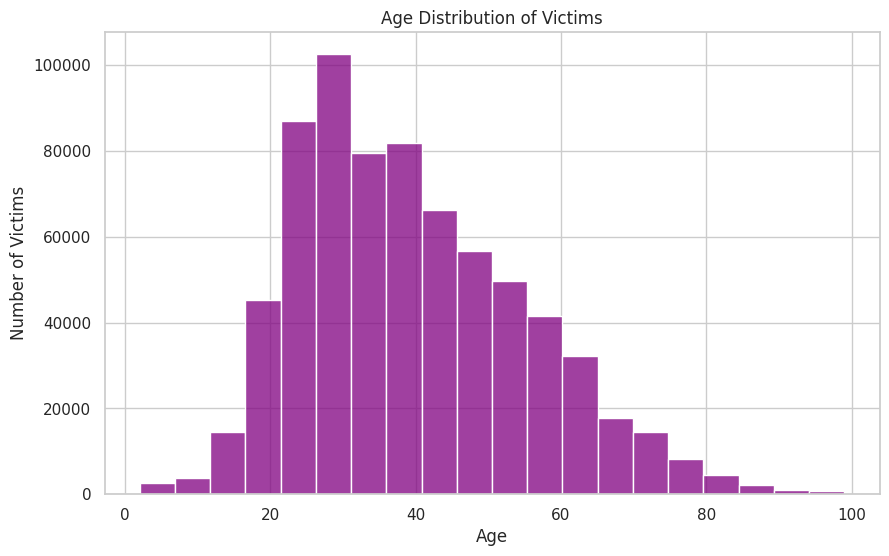

In [ ]:
# Plotting the figure
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Victim Age'], bins=20, kde=False, color='purple')
plt.title('Age Distribution of Victims')
plt.xlabel('Age')
plt.ylabel('Number of Victims')
plt.show()

**e. Grouped bar chart**

Grouped bar chart: Crimes by Area name and Gender of the victim

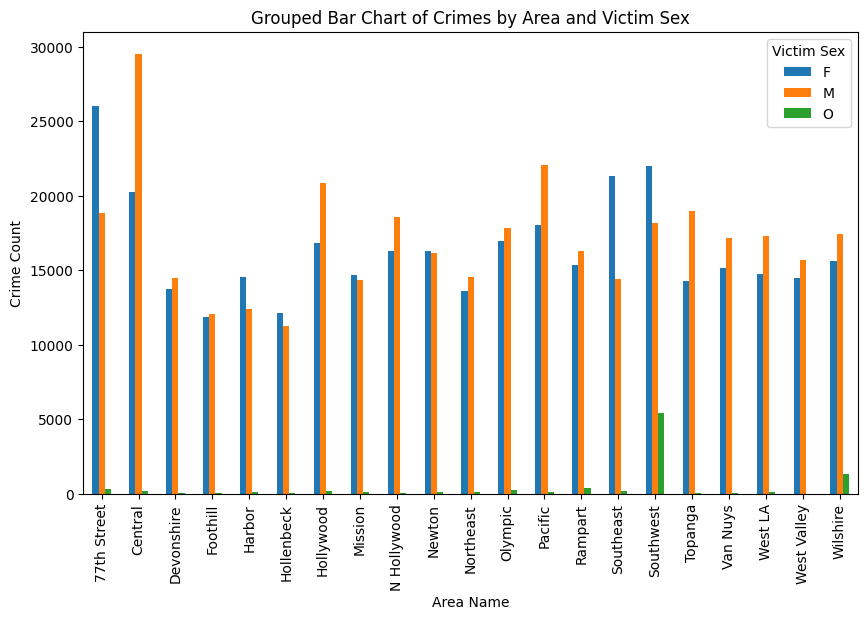

In [ ]:
import matplotlib.pyplot as plt

# Count the frequency of each area
area_counts = df_cleaned['Area Name'].value_counts()

# Group by 'Area Name' and 'Victim Sex', then count occurrences
count_df = df_cleaned.groupby(['Area Name', 'Victim Sex']).size().reset_index(name='Count')

# Pivot the data for a grouped bar chart
pivot_df = count_df.pivot_table(index='Area Name', columns='Victim Sex', values='Count', aggfunc='sum', fill_value=0)

# Plotting
ax = pivot_df.plot(kind='bar', figsize=(10, 6))
ax.set_xlabel('Area Name')
ax.set_ylabel('Crime Count')
ax.set_title('Grouped Bar Chart of Crimes by Area and Victim Sex')
plt.xticks(rotation=90)
plt.legend(title='Victim Sex')
plt.show()

Grouped bar chart: Crimes by Premise and Gender of the victim

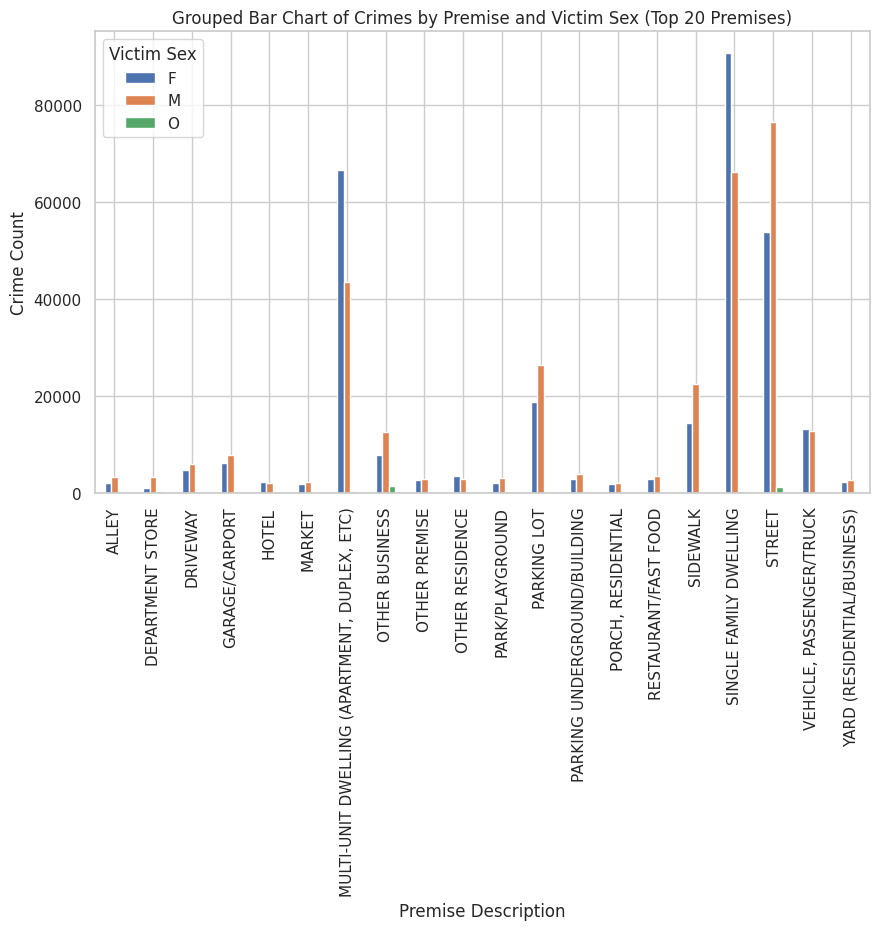

In [ ]:
# Count the frequency of each premise
premise_counts = df_cleaned['Premise Description'].value_counts()

# Get the top 20 premises
top_20_premises = premise_counts.head(20).index

# Filter the dataframe to include only the top 20 premises
filtered_df = df_cleaned[df_cleaned['Premise Description'].isin(top_20_premises)]

# Group by 'Premise Description' and 'Victim Sex', then count occurrences
count_df = filtered_df.groupby(['Premise Description', 'Victim Sex']).size().reset_index(name='Count')

# Pivot the data for a grouped bar chart
pivot_df = count_df.pivot_table(index='Premise Description', columns='Victim Sex', values='Count', aggfunc='sum', fill_value=0)

# Plotting
ax = pivot_df.plot(kind='bar', figsize=(10, 6))
ax.set_xlabel('Premise Description')
ax.set_ylabel('Crime Count')
ax.set_title('Grouped Bar Chart of Crimes by Premise and Victim Sex (Top 20 Premises)')
plt.xticks(rotation=90)
plt.legend(title='Victim Sex')
plt.show()

Grouped bar chart: Crimes by Premise and Seriousness (Part 1-2) for top 20 Locations

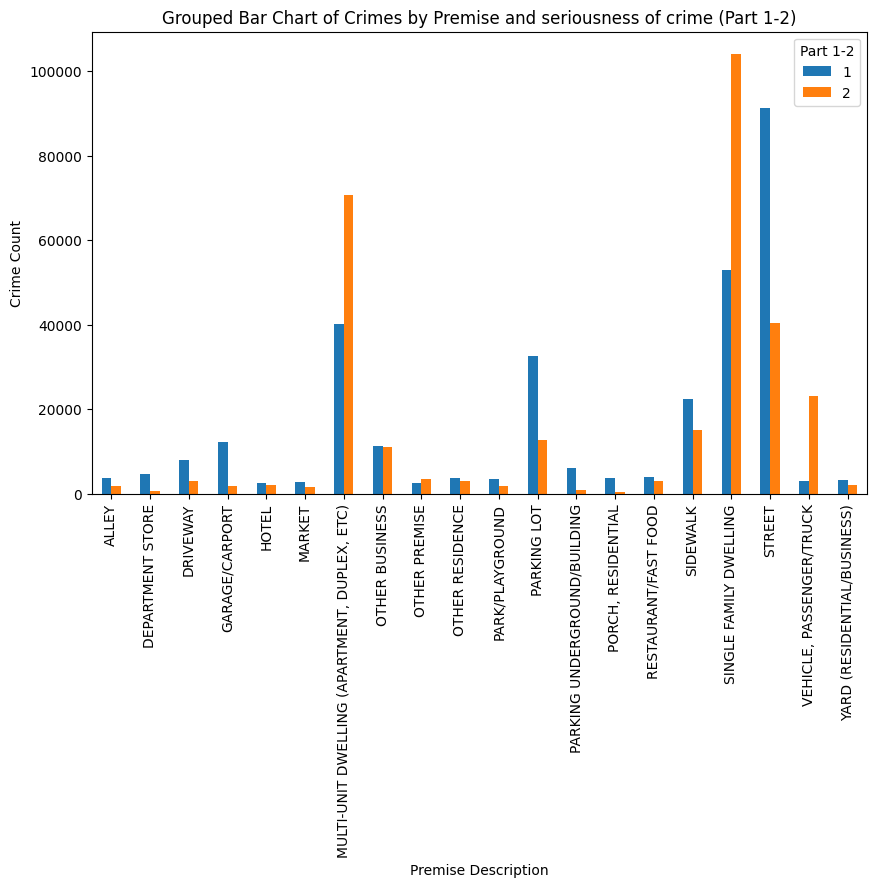

In [ ]:
# Count the frequency of each premise
premise_counts = df_cleaned['Premise Description'].value_counts()

# Get the top 20 premises
top_20_premises = premise_counts.head(20).index

# Filter the DataFrame for rows with the top 20 premises
top_premises_df = df_cleaned[df_cleaned['Premise Description'].isin(top_20_premises)]


count_df = top_premises_df.groupby(['Premise Description', 'Part 1-2']).size().reset_index(name='Count')

# Pivot the data for grouped bar chart
pivot_df = count_df.pivot_table(index='Premise Description', columns='Part 1-2', values='Count', aggfunc='sum', fill_value=0)

# Plotting
ax = pivot_df.plot(kind='bar', figsize=(10, 6))
ax.set_xlabel('Premise Description')
ax.set_ylabel('Crime Count')
ax.set_title('Grouped Bar Chart of Crimes by Premise and seriousness of crime (Part 1-2)')
plt.xticks(rotation=90)
plt.legend(title='Part 1-2')
plt.show()

**f. Box plot**

Box Plot: Victim Age Distribution

<ipython-input-23-106b2b566cba>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-23-106b2b566cba>:9: UserWarning:

The palette list has more values (6) than needed (1), which may not be intended.



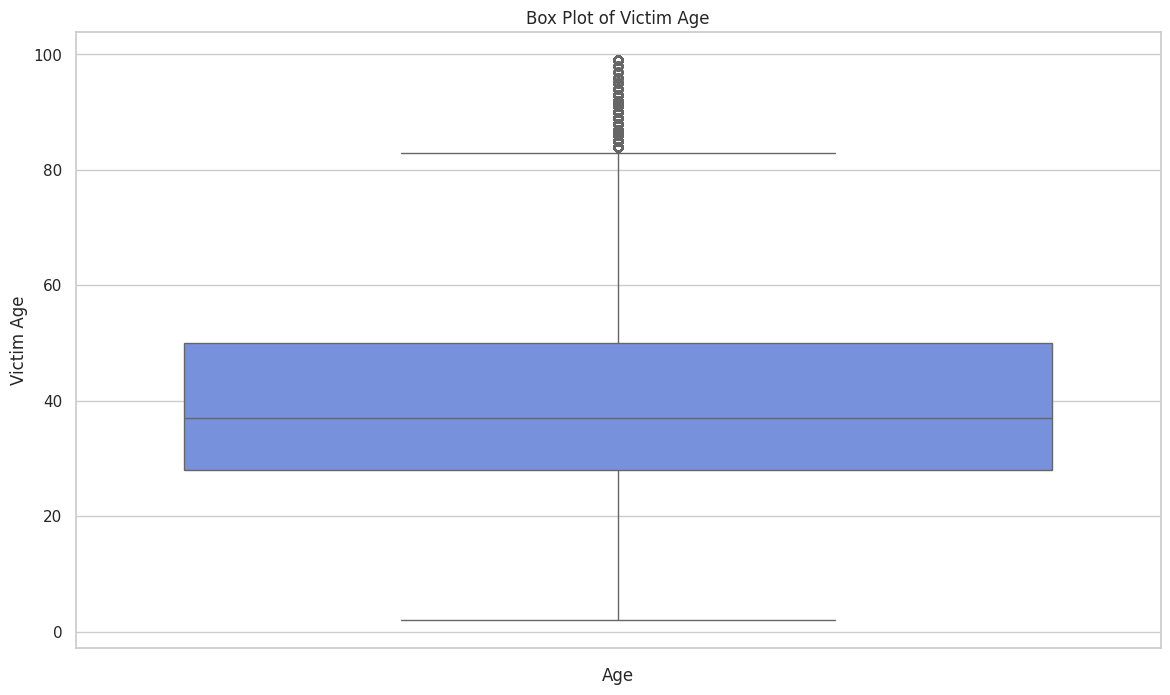

In [ ]:
import seaborn as sns

# Set the style and palette for the plot
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm")  # You can choose from various seaborn color palettes

# Create a colorful box plot for 'Victim Age' by 'Area Name'
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_cleaned['Victim Age'], palette=palette)

# Adding titles and labels
plt.title('Box Plot of Victim Age')
plt.xlabel('Age')

# Display the box plot
plt.show()

Box plot: Distribution of Victim Age Across Different Areas

<ipython-input-24-fe44b30f218c>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-24-fe44b30f218c>:7: UserWarning:


The palette list has fewer values (12) than needed (21) and will cycle, which may produce an uninterpretable plot.



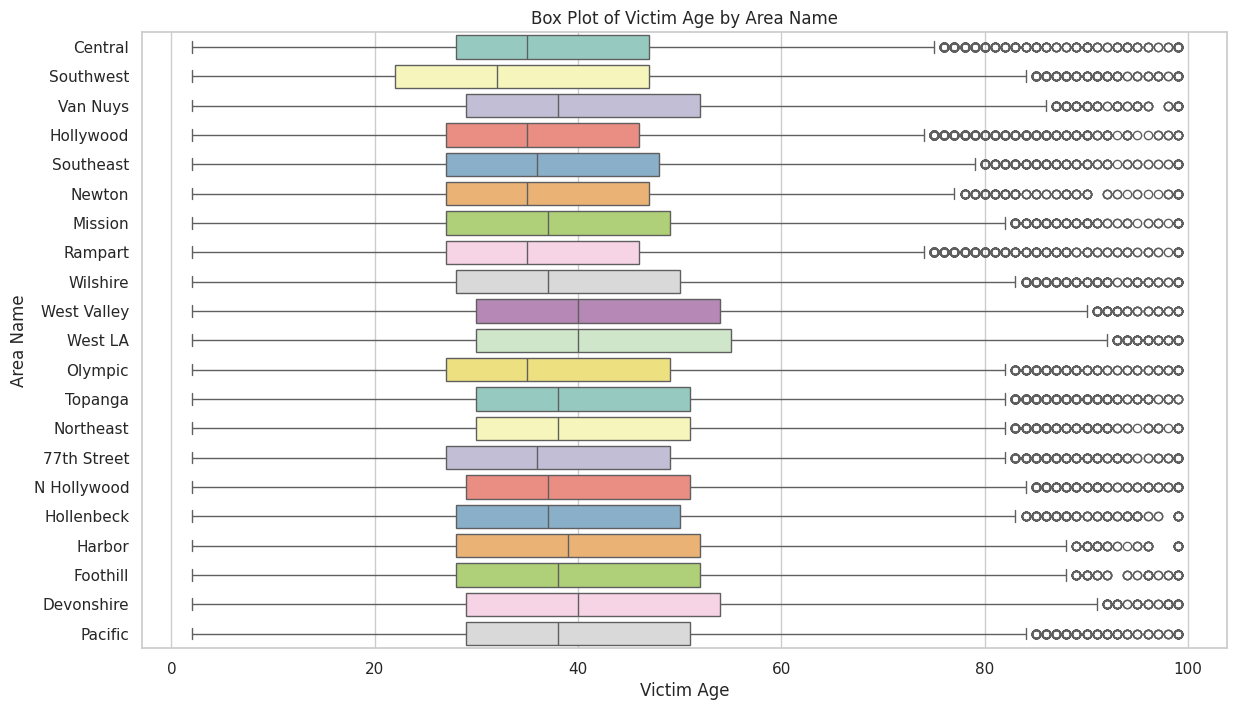

In [ ]:
# Set the style and palette for the plot
sns.set(style="whitegrid")
palette = sns.color_palette("Set3")  # You can choose from various seaborn color palettes

# Create a colorful box plot for 'Victim Age' by 'Area Name'
plt.figure(figsize=(14, 8))
sns.boxplot(x='Victim Age', y='Area Name', data=df_cleaned, palette=palette)

# Adding titles and labels
plt.title('Box Plot of Victim Age by Area Name')
plt.xlabel('Victim Age')
plt.ylabel('Area Name')

# Display the box plot
plt.show()

**g. Violin chart**

Violin Plot: Distribution of Victim Ages by Crime Type

<ipython-input-26-ae1986a81bf8>:7: FutureWarning:



The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.



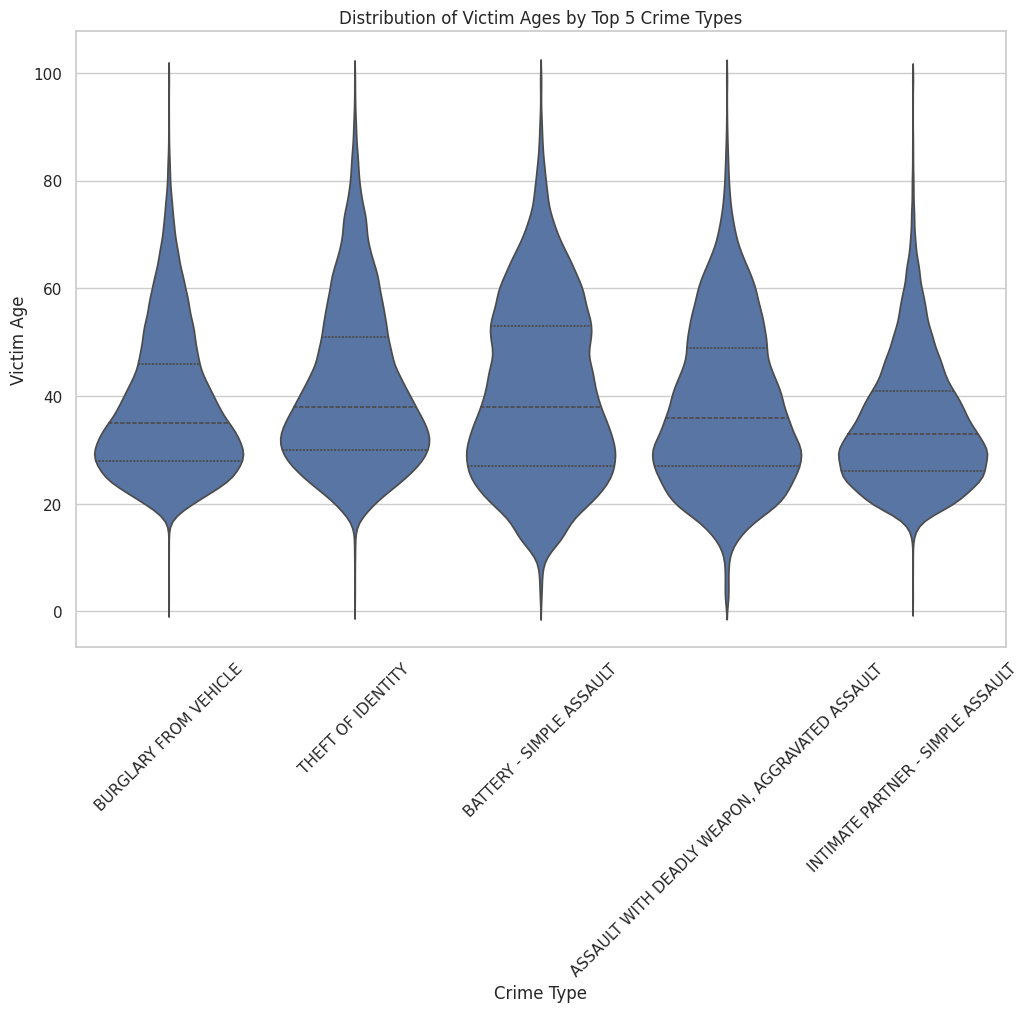

In [ ]:
# Filtering top 5 crimes only
top_crimes = df_cleaned['Crime Code Description'].value_counts().nlargest(5).index
filtered_violin_data = df_cleaned[df_cleaned['Crime Code Description'].isin(top_crimes)]

# Plotting the figure
plt.figure(figsize=(12, 8))
sns.violinplot(x='Crime Code Description', y='Victim Age', data=filtered_violin_data, inner='quartile', scale='width')
plt.title('Distribution of Victim Ages by Top 5 Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Victim Age')
plt.xticks(rotation=45)
plt.show()

**h. Scatter plot**

Scatter plot: Victim Age Distribution Across Geographic Locations

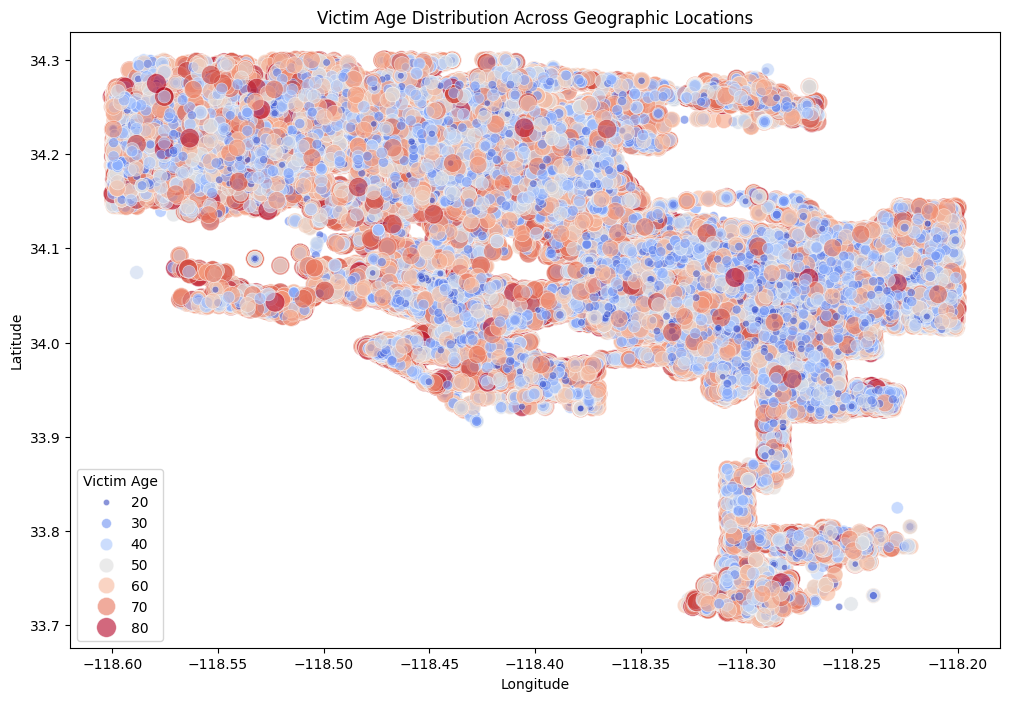

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

crime_data = pd.read_csv(root_folder + 'cleaned_data.csv')

# Limiting the data to a specific age range and geographic region (optional)
filtered_data = crime_data[(crime_data['Latitude'].between(33.7, 34.3)) &
                           (crime_data['Longitude'].between(-118.6, -118.2)) &
                           (crime_data['Victim Age'].between(20, 80))]

# Scatter plot with adjusted color palette and size mapping
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Victim Age', size='Victim Age',
                sizes=(20, 200), data=filtered_data, palette='coolwarm', alpha=0.6)
plt.title('Victim Age Distribution Across Geographic Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Victim Age')
plt.show()

**i. Geo Map: This should be run seperately before loading any other dataset as it requires lots of memory and loading other datasets in memory causes issue**

In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Load the cleaned dataset which is significantly smaller in size
df_cleaned = pd.read_csv(root_folder + 'cleaned_data.csv')
#Extract only 300k rows as it keeps on throwing out of memory error to plot everything
df_cleaned = df_cleaned.iloc[:300000,:]

# Initialize the map centered around the mean coordinates
m = folium.Map(location=[df_cleaned['Latitude'].mean(), df_cleaned['Longitude'].mean()], zoom_start=12)

# Add a marker cluster to handle multiple markers efficiently
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the map
for idx, row in df_cleaned.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Crime Code Description']}, {row['Date Reported']}",
    ).add_to(marker_cluster)

#Save the map as html file cuz could not display and collab kept on crashing
m.save('la_crime_map.html')

**j. Line chart**

Time Series Analysis: Line chart showing number of crimes reported over different hours of a day


In [ ]:
# Extract hour from time
df_cleaned['hour'] = pd.to_datetime(df_cleaned['Time Occured'], format='%H:%M:%S').dt.hour

# Count occurrences per hour
hourly_counts = df_cleaned['hour'].value_counts().sort_index()

# Plotting using Plotly Express
fig = px.line(hourly_counts, x=hourly_counts.index, y=hourly_counts.values,
              labels={'x': 'Hour of the Day', 'y': 'Number of Crimes'},
              title='Number of Crimes per Hour of the Day',
              markers=True)

# Customize x-axis to show all hours of the day
fig.update_xaxes(tickmode='linear', tick0=0, dtick=1)

# Add gridlines and show the plot
fig.update_layout(xaxis=dict(showgrid=True), yaxis=dict(showgrid=True))
fig.show()

Time Series Analysis: Line chart showing the number of crimes reported over time

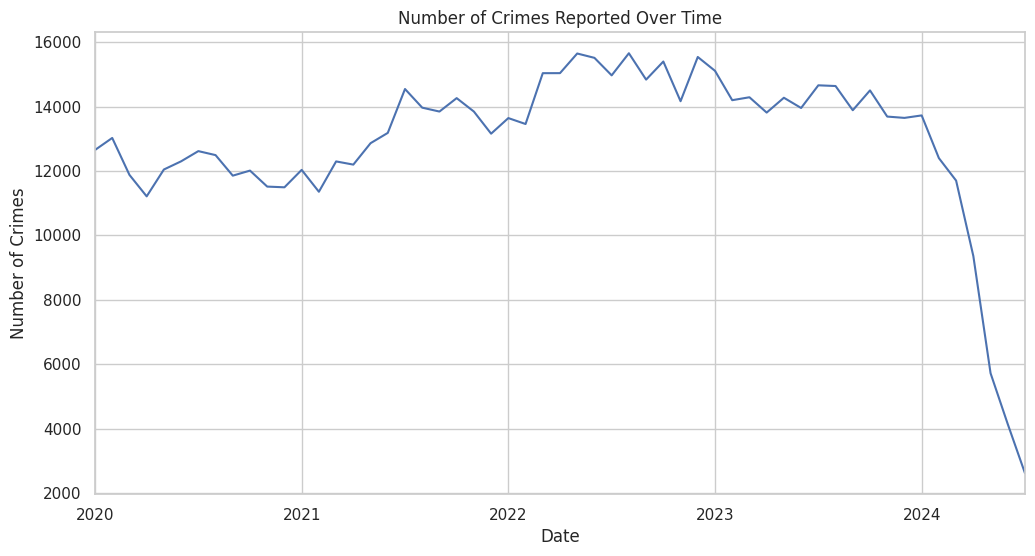

In [ ]:
# Convert date columns to datetime
df_cleaned['Date Reported'] = pd.to_datetime(df_cleaned['Date Reported'], errors='coerce')
df_cleaned['Date Occurred'] = pd.to_datetime(df_cleaned['Date Occurred'], errors='coerce')

# Plotting figure
plt.figure(figsize=(12, 6))
df_cleaned['Date Reported'].groupby(df_cleaned['Date Reported'].dt.to_period('M')).size().plot(kind='line')
plt.title('Number of Crimes Reported Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

Time Series Analysis: Line chart showing crimes occurring on different days of the week

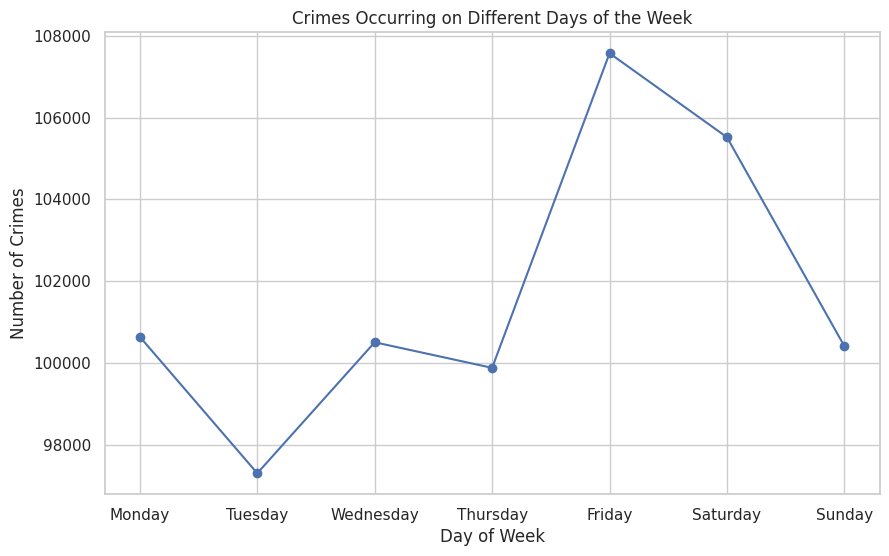

In [ ]:
# Plotting the figure
plt.figure(figsize=(10, 6))
df_cleaned['Day of Week'] = df_cleaned['Date Occurred'].dt.day_name()
df_cleaned['Day of Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='line', marker='o')
plt.title('Crimes Occurring on Different Days of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')
plt.show()

**k. Heat map**

Heatmap: Distribution of crimes across top 10 different areas

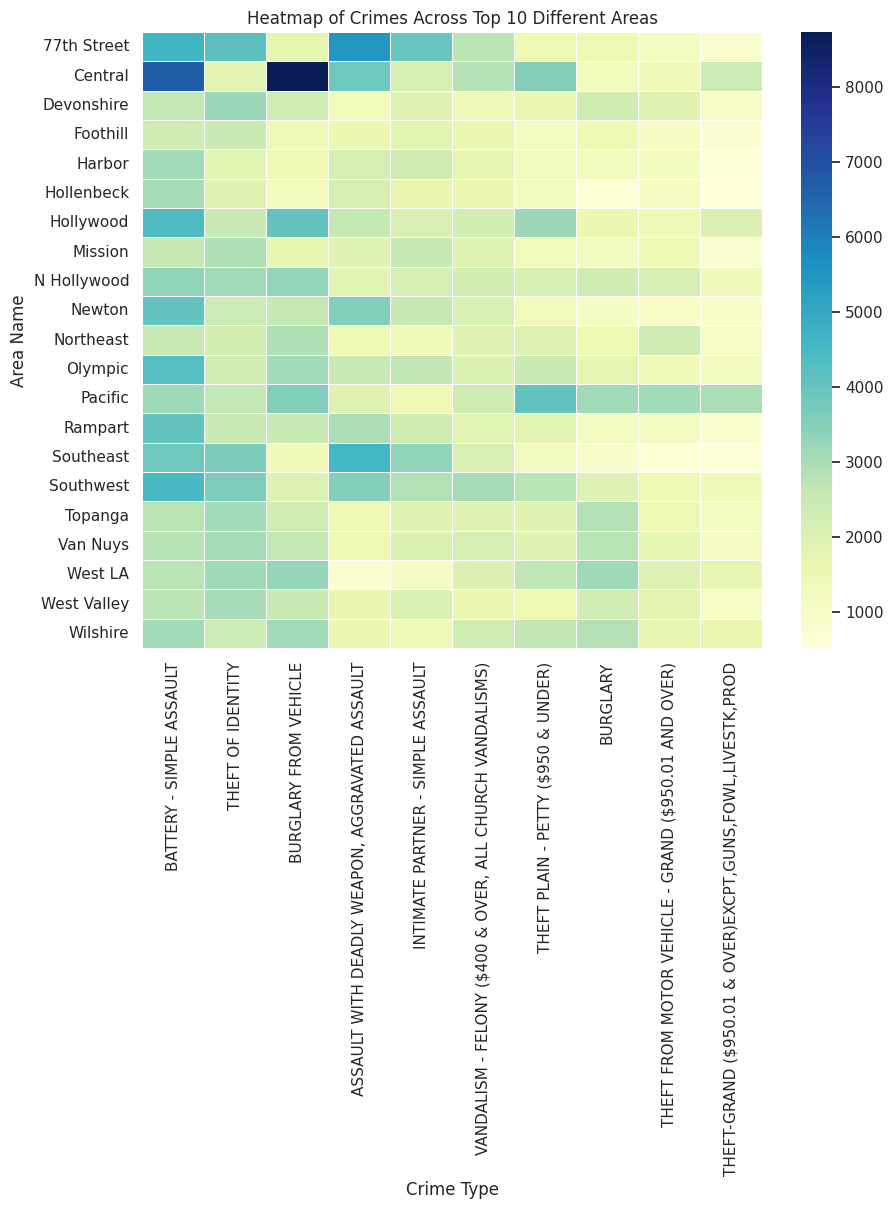

In [ ]:
# Plotting heatmap figure
plt.figure(figsize=(10, 8))
area_crime_counts = df_cleaned.groupby(['Area Name', 'Crime Code Description']).size().unstack()
area_crime_counts = area_crime_counts.loc[:, area_crime_counts.sum().nlargest(10).index]
sns.heatmap(area_crime_counts, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Crimes Across Top 10 Different Areas')
plt.xlabel('Crime Type')
plt.ylabel('Area Name')
plt.show()

## Pyspark Part Starts Here

**Installation**

In [ ]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://www.apache.org/dyn/closer.lua/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

import os
import sys
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"


import findspark
findspark.init()
findspark.find()

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [945 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,232 kB]
Get:13 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [

ValueError: Couldn't find Spark, make sure SPARK_HOME env is set or Spark is in an expected location (e.g. from homebrew installation).

**Data-Pre processing in pyspark**

In [ ]:
import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

spark = SparkSession \
       .builder \
       .appName("Pyspark Crime Dataset") \
       .config("spark.sql.legacy.timeParserPolicy", "LEGACY") \
       .getOrCreate()
df = spark.read.csv(root_folder + 'crime.csv', header=True)
df.printSchema()

**Removing irrelevant columns**

In [ ]:
df = df.drop('DR_NO', 'AREA', 'Crm Cd', 'Mocodes','Premis Cd', 'Weapon Used Cd', 'Status')

In [ ]:
# Checking for null values in each column
null_counts = df.select([F.sum(F.col(column).isNull().cast("int")).alias(column) for column in df.columns])
null_counts.show()

In [ ]:
# Total number of rows in the DataFrame
total_rows = df.count()

# Compute null counts for all columns at once
null_counts = df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df.columns])

# Collect the result to get the null counts for each column
null_counts_dict = null_counts.collect()[0].asDict()

# Calculate the columns to drop
columns_to_drop = [col_name for col_name, null_count in null_counts_dict.items() if (null_count / total_rows) * 100 >= 75.0]

# Drop the columns with more than 75% missing data
df = df.drop(*columns_to_drop)

df.show()

In [ ]:
null_counts = df.select([F.sum(F.col(column).isNull().cast("int")).alias(column) for column in df.columns])
null_counts.show()

In [ ]:
# Dropping rows with null value for remaining columns
# 'Weapon Desc' is filled with default value
df = df.dropna(subset=['Vict Sex', 'Vict Descent', 'Premis Desc', 'Crm Cd 1'])
df = df.na.fill(value="No Weapons Used", subset=["Weapon Desc"])

In [ ]:
null_counts = df.select([F.sum(F.col(column).isNull().cast("int")).alias(column) for column in df.columns])
null_counts.show()

**Formatting the data**

In [ ]:
# Pad 'TIME OCC' column with leading zeros to ensure it is at least 4 characters long
df = df.withColumn('TIME OCC', F.lpad(F.col('TIME OCC').cast("string"), 4, '0'))

# Extract hours and minutes from the padded time value
df = df.withColumn('HOURS', F.substring('TIME OCC', 1, 2))
df = df.withColumn('MINUTES', F.substring('TIME OCC', 3, 2))

# Combine hours and minutes into "HH:MM" format and drop intermediate columns
# This could not be converted to time type as it does not exist in pyspark
df = df.withColumn('TIME OCC', F.concat_ws(':', F.col('HOURS'), F.col('MINUTES')))
df = df.drop('HOURS', 'MINUTES')

# Convert 'Date Rptd' into proper date format (MM/DD/YYYY)
df = df.withColumn('Date Rptd', F.to_date(F.col('Date Rptd'), 'MM/dd/yyyy').cast('date'))

# Convert 'DATE OCC' into proper date format (MM/DD/YYYY)
df = df.withColumn('DATE OCC', F.to_date(F.col('DATE OCC'), 'MM/dd/yyyy').cast('date'))

df.printSchema()

In [ ]:
df = df.filter((df['Vict Age'] >= 1) & (df['Vict Age'] < 100))
# Step 1: Extracting unique values inside 'Vict Sex' column before replacement
unique_gender_before = df.select("Vict Sex").distinct()
unique_gender_before.show()

# Step 2: Replacing values in the 'Vict Sex' column based on the mapping
df = df.withColumn(
    "Vict Sex",
    F.when(F.col("Vict Sex") == 'M', 'M')
    .when(F.col("Vict Sex") == 'F', 'F')
    .when(F.col("Vict Sex") == 'H', 'O')
    .when(F.col("Vict Sex") == 'X', 'O')
    .otherwise(F.col("Vict Sex"))  # Keep values unchanged if they don't match any conditions
)

In [ ]:
df = df.dropDuplicates()
df_cleaned = df \
    .withColumnRenamed('Date Rptd', 'Date Reported') \
    .withColumnRenamed('DATE OCC', 'Date Occurred') \
    .withColumnRenamed('TIME OCC', 'Time Occured') \
    .withColumnRenamed('AREA NAME', 'Area Name') \
    .withColumnRenamed('Rpt Dist No', 'Reporting District Number') \
    .withColumnRenamed('Part 1-2', 'Part 1-2') \
    .withColumnRenamed('Crm Cd Desc', 'Crime Code Description') \
    .withColumnRenamed('Vict Age', 'Victim Age') \
    .withColumnRenamed('Vict Sex', 'Victim Sex') \
    .withColumnRenamed('Vict Descent', 'Victim Descent') \
    .withColumnRenamed('Premis Desc', 'Premise Description') \
    .withColumnRenamed('Weapon Desc', 'Weapon Description') \
    .withColumnRenamed('Status Desc', 'Case Status Description') \
    .withColumnRenamed('Crm Cd 1', 'Crime Code 1') \
    .withColumnRenamed('LOCATION', 'Location') \
    .withColumnRenamed('LAT', 'Latitude') \
    .withColumnRenamed('LON', 'Longitude')

# Display the schema to verify the renamed columns
df_cleaned.printSchema()
df_cleaned.show()